In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
plt.rc('lines', linewidth=3, markersize=2)
plt.rc('font', size=20, family='serif', weight=300)
plt.rc('mathtext', fontset = 'dejavuserif')
plt.rc('axes', linewidth=2)
plt.rc('patch', linewidth=3)
plt.rc('xtick.major', width=1.5, size=6)
plt.rc('ytick.major', width=1.5, size=6)

In [6]:
# define standard map function to transform (I, theta) to (I', theta')

def map_fn(I, theta, k_0):
    new_I = np.mod(I + k_0 * np.sin(theta), 2*np.pi)
    new_theta = np.mod(theta + new_I, 2*np.pi)
    return new_I, new_theta

In [7]:
# set number of timesteps and I, theta arrays

n = 1000 

k0 = 0.5
k1 = 0.9
k2 = 1.2
k3 = 1.8

I = np.zeros(n+1)
theta = np.zeros(n+1)

<IPython.core.display.Javascript object>


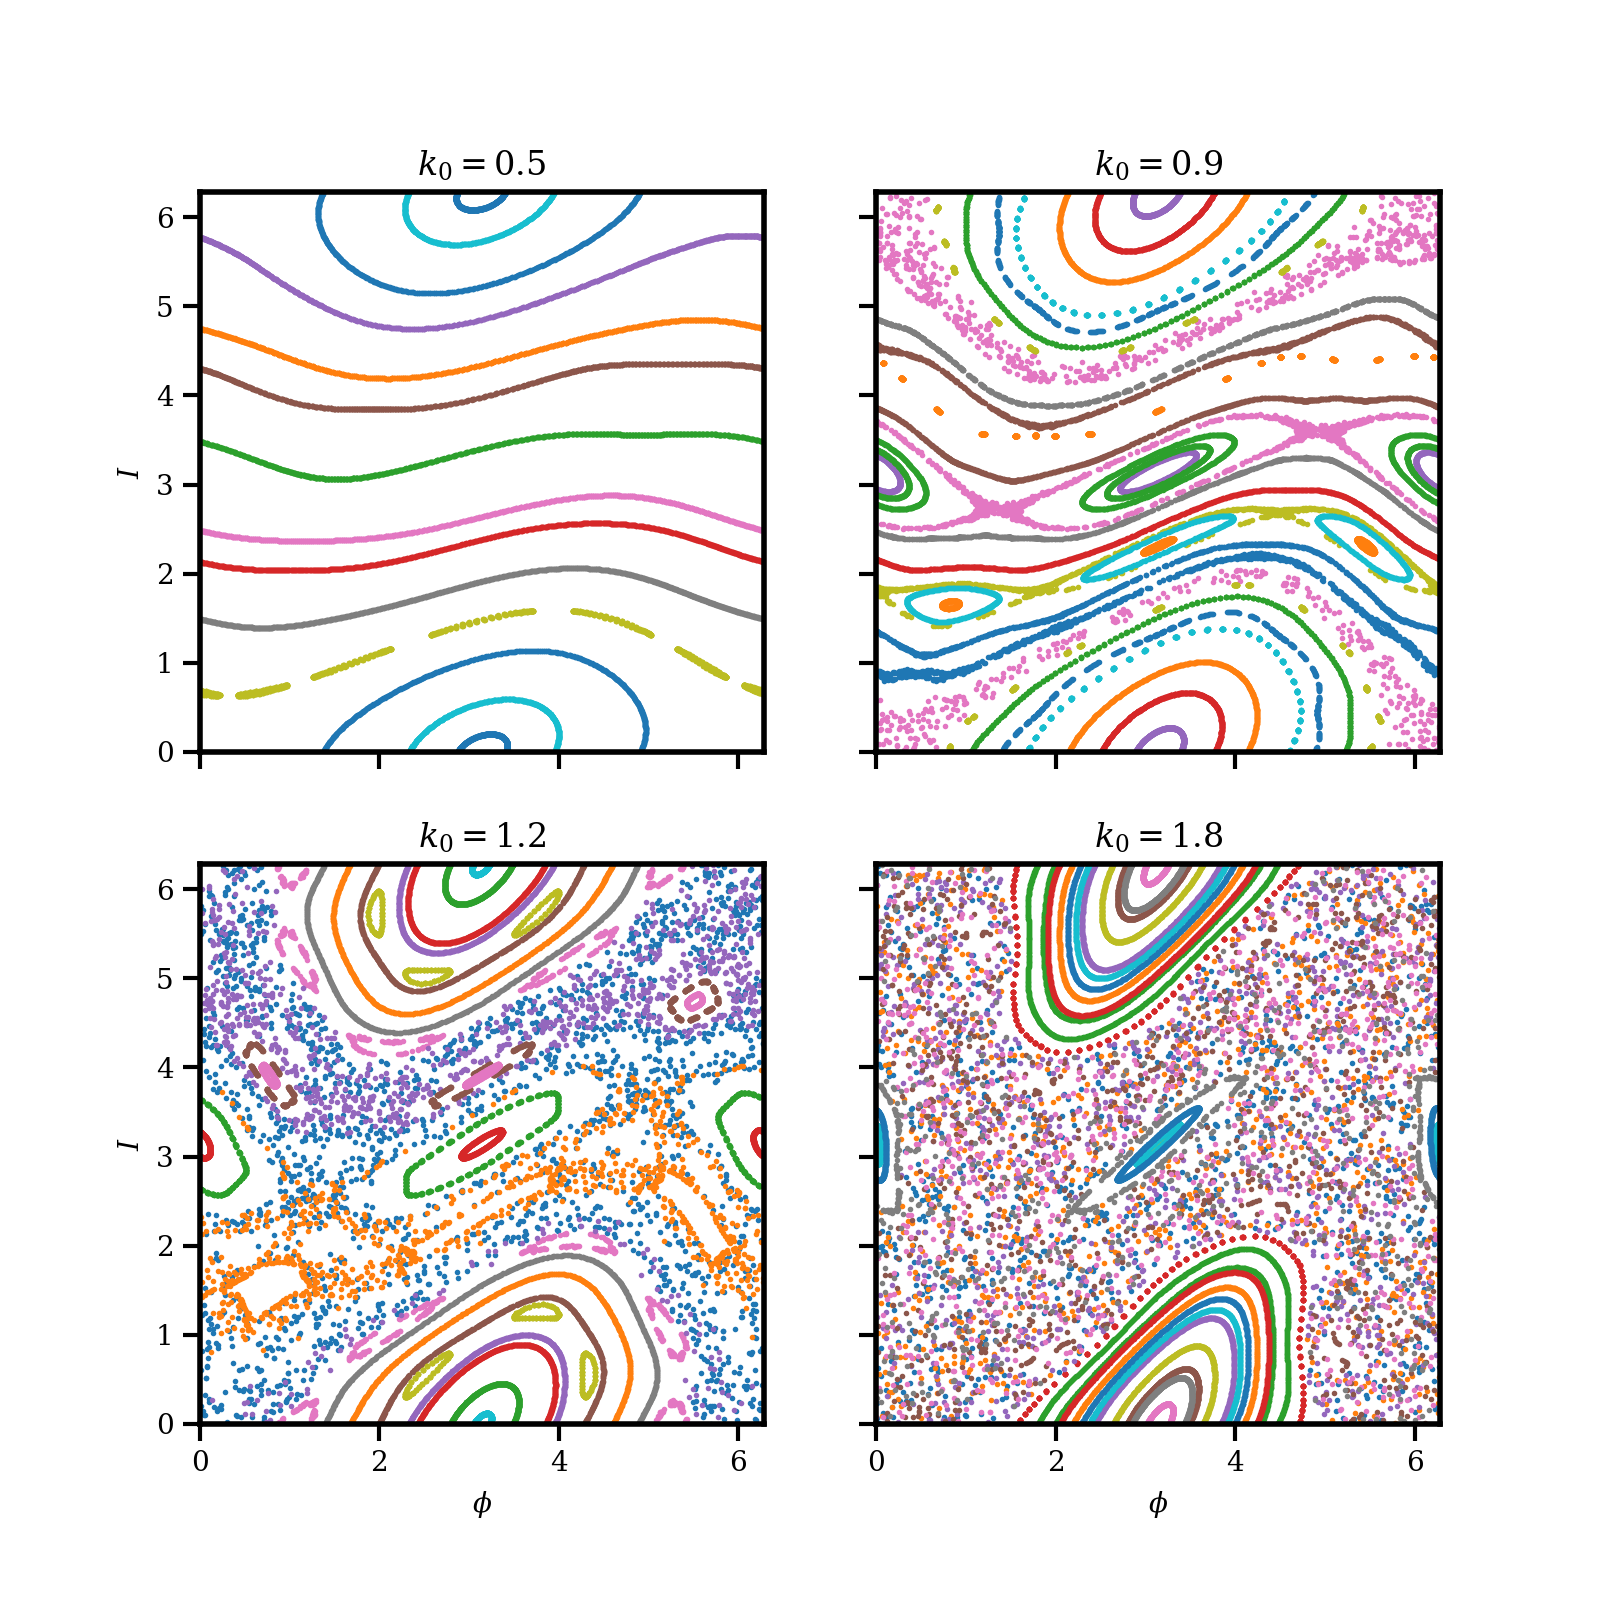

8

In [8]:
# define class to run a map based on where you've clicked

%matplotlib notebook

fig, ax = plt.subplots(2, 2, figsize=(8,8), sharex=True, sharey=True)

ax0 = ax[0,0]
ax1 = ax[0,1]
ax2 = ax[1,0]
ax3 = ax[1,1]

ax0.set_xlim([0,2*np.pi])
ax0.set_ylim([0,2*np.pi])
ax0.set_ylabel('$I$')
ax0.set_title('$k_0 =' + str(k0) + '$')

ax1.set_xlim([0,2*np.pi])
ax1.set_ylim([0,2*np.pi])
ax1.set_title('$k_0 =' + str(k1) + '$')

ax2.set_xlim([0,2*np.pi])
ax2.set_ylim([0,2*np.pi])
ax2.set_xlabel('$\phi$')
ax2.set_ylabel('$I$')
ax2.set_title('$k_0 =' + str(k2) + '$')

ax3.set_xlim([0,2*np.pi])
ax3.set_ylim([0,2*np.pi])
ax3.set_xlabel('$\phi$')
ax3.set_title('$k_0 =' + str(k3) + '$')

def RunMap(event):
    ax =  event.inaxes
    if ax == ax0:
        k = k0
    elif ax == ax1:
        k = k1
    elif ax == ax2:
        k = k2
    else:
        k = k3
    I[0] = event.ydata
    theta[0] = event.xdata
    for i in range(1,n+1):
        I[i], theta[i] = map_fn(I[i-1], theta[i-1], k)
    ax.plot(theta, I, '.')
    event.canvas.draw()

fig.canvas.mpl_connect('button_press_event', RunMap)